In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
x = df.drop(columns=['math_score'], axis=1)

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
x.shape

(1000, 7)

In [7]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
num_feat = x.select_dtypes(exclude='object').columns
cat_feat = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_trans = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_trans, cat_feat),
        ('StandardScaler', num_transformer, num_feat)
    ]
)

In [9]:
x = preprocessor.fit_transform(x)

In [10]:
x.shape

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(true, predicted) :
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(true, predicted)
    return mae, mse, rmse, r2_sc

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K neighbour regesoor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performence for training set")
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print('-Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('-R2 Score: {:.4f}'.format(model_train_r2))

    print("----------------------------")

    print("Model performence for test set")
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print('-Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('-R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')




Linear Regression
Model performence for training set
- Root Mean Squared Error: 5.3272
- Mean Absolute Error: 4.2784
-Mean Squared Error: 28.3788
-R2 Score: 0.8741
----------------------------
Model performence for test set
- Root Mean Squared Error: 5.4108
- Mean Absolute Error: 4.2279
-Mean Squared Error: 29.2763
-R2 Score: 0.8797


Lasso
Model performence for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
-Mean Squared Error: 43.4784
-R2 Score: 0.8071
----------------------------
Model performence for test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
-Mean Squared Error: 42.5064
-R2 Score: 0.8253


Ridge
Model performence for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
-Mean Squared Error: 28.3378
-R2 Score: 0.8743
----------------------------
Model performence for test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
-Mean Squared Error: 29.0563
-R2 Score: 0.8806


K neighbour r

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model_name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879689
5,Random Forest Regressor,0.851910
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.850432
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K neighbour regesoor,0.783898
4,Decision Tree,0.740505


In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


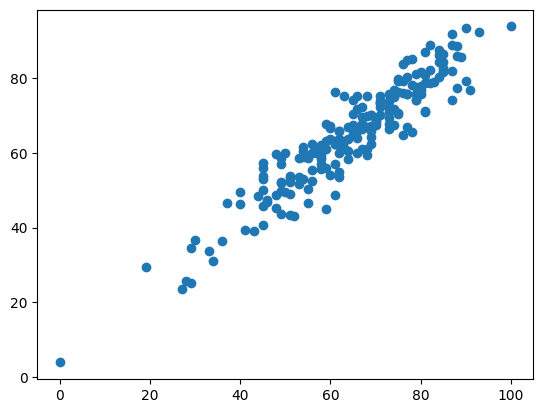

In [18]:
plt.scatter(y_test, y_pred)
plt.show()

In [20]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted values': y_pred, 'Difference values': y_test - y_pred})
pred_df

,Actual value,Predicted values,Difference values
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750
